In [1]:
import os
from pathlib import Path

import sys
print(sys.path)

from angcal import MythenDetectorSpecifications, FlatField, AngleCalibration, MythenFileReader

import numpy as np

['/home/mazzol_a/Documents/aare/build', '/home/mazzol_a/Documents/angle_calibration/build/angle_calibration', '/home/mazzol_a/.conda/envs/aare/lib/python311.zip', '/home/mazzol_a/.conda/envs/aare/lib/python3.11', '/home/mazzol_a/.conda/envs/aare/lib/python3.11/lib-dynload', '', '/home/mazzol_a/.conda/envs/aare/lib/python3.11/site-packages']


ModuleNotFoundError: No module named 'angcal'

In [2]:
def data_path():
    env_value = os.environ.get("AARE_TEST_DATA")
    if not env_value:
        raise RuntimeError("Environment variable AARE_TEST_DATA is not set or is empty")

    return Path(env_value)


In [3]:
import matplotlib.pyplot as plt

def plot(array : np.array): 
    plt.plot(np.arange(0, array.size,1), array)
    plt.show()
    

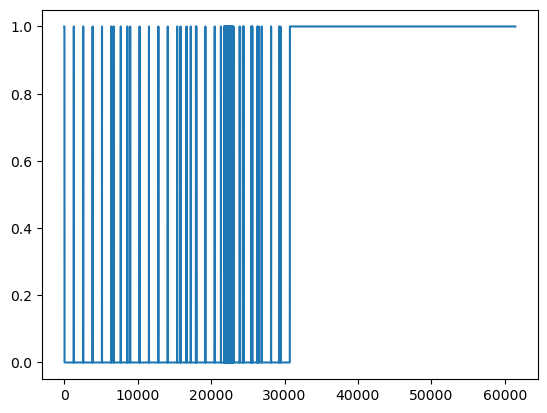

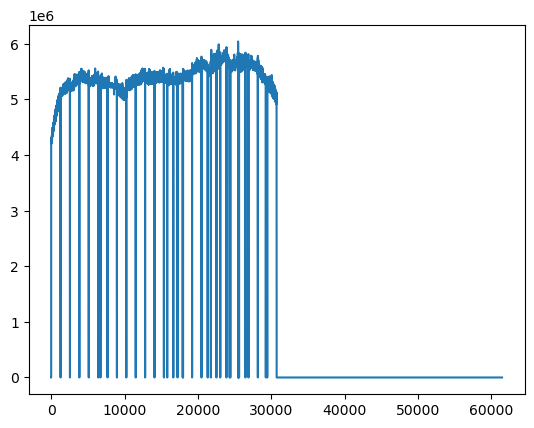

In [4]:
mythendetectorspecifications = MythenDetectorSpecifications()

mythendetectorspecifications.read_bad_channels_from_file(str(data_path() / "AngleCalibration_Test_Data/bc2023_003_RING.chans"))

plot(mythendetectorspecifications.bad_channels)

flatfield = FlatField(mythendetectorspecifications)

#alternative
#flatfield_data = np.loadtxt(data_path() / "AngleCalibration_Test_Data/Flatfield_E22p0keV_T11000eV_up_48M_a_LONG_Feb2023_open_WS_SUMC.raw", dtype=np.uint32, usecols=1)
#flatfield.flatfield = flatfield_data

flatfield.read_flatfield_from_file(str(data_path() / "AngleCalibration_Test_Data/Flatfield_E22p0keV_T11000eV_up_48M_a_LONG_Feb2023_open_WS_SUMC.raw"))

flatfield_data = flatfield.flatfield

plot(flatfield_data)


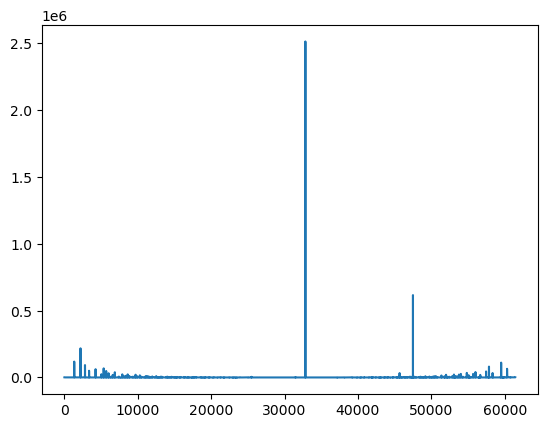

In [5]:
mythenfilereader = MythenFileReader(data_path() / "AngleCalibration_Test_Data")
frame = mythenfilereader.read_frame("ang1up_22keV_LaB60p3mm_48M_a_0320.h5")

plot(frame.photon_counts)

position: 0.99955


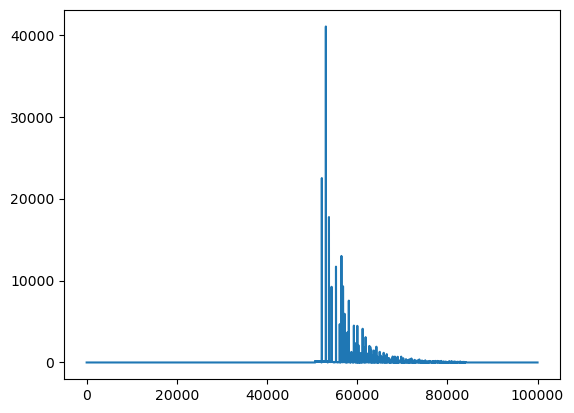

In [ ]:
filepath = data_path() / "AngleCalibration_Test_Data"
anglecalibration = AngleCalibration(mythendetectorspecifications, flatfield, filepath) 

anglecalibration.read_initial_calibration_from_file(str(filepath / "Angcal_2E_Feb2023_P29.off"))

new_photon_counts = anglecalibration.calculate_fixed_bin_angle_width_histogram("ang1up_22keV_LaB60p3mm_48M_a_0320.h5")

plot(new_photon_counts) #mmh is this correct? - I think bad channels file does not match 



61440
position: 0.99955
61440
position: 0.8999
61440
position: 0.8002
61440
position: 0.6999
61440
position: 0.60015
61440
position: 0.5002
61440
position: 0.40045
61440
position: 0.3002
61440
position: 0.20035
61440
position: 0.0999
61440
position: 0.00015
61440
position: -0.09985
61440
position: -0.2001
61440
position: -0.30005
61440
position: -0.4002
61440
position: -0.49995
61440
position: -0.6002
61440
position: -0.7001
61440
position: -0.8004
61440
position: -0.90035


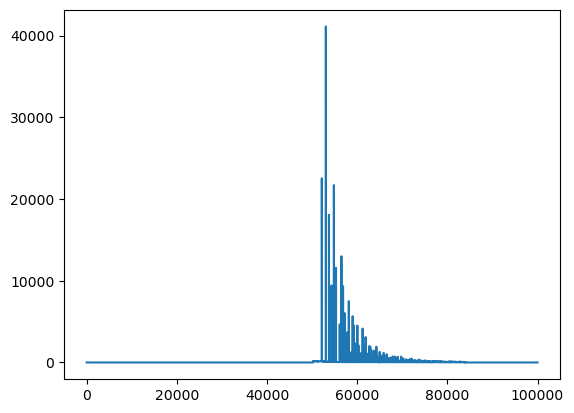

In [15]:
file_list = ["ang1up_22keV_LaB60p3mm_48M_a_03" + str(i) + ".h5" for i in range(20,40)]
anglecalibration.calculate_fixed_bin_angle_width_histogram(file_list)

new_photon_counts = anglecalibration.new_photon_counts

plot(new_photon_counts)